<a href="https://colab.research.google.com/github/prabhav2103/DevSoc-First-Assignment/blob/main/Copy_of_Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [18]:
# Import the required libraries
import pandas as pd

## Data Preprocessing

### **Exploring the dataset**

Let's start with loading the training data from the csv into a pandas dataframe



Load the datasets from GitHub. Train dataset has already been loaded for you in df below. To get test dataset use the commented code.

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/train_processed_splitted.csv')

Let's see what the first 5 rows of this dataset looks like

In [20]:
df.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,Utilities,SalePrice
0,11553,1051,1159,336,0,5,AllPub,158000
1,8400,1052,1052,288,0,5,AllPub,138500
2,8960,1008,1028,360,0,6,AllPub,115000
3,11100,0,930,308,0,7,AllPub,84900
4,15593,1304,2287,667,0,4,AllPub,225000


What are all the features present? What is the range for each of the features along with their mean?

In [21]:
listoffeatures = df.columns.tolist()
for feature in listoffeatures:
  if isinstance(df[feature].max(), (int,float)):
    feature_range = df[feature].max() - df[feature].min()
    mean = df[feature].mean()
    print(f"Feature: {feature}:")
    print(f"Range: {feature_range}:")
    print(f"Mean: {mean}:")
    print("\n")
  else:
    print(f"Feature: {feature}:")
    print("Values are strings")
    print("\n")

Feature: LotArea:
Range: 213945:
Mean: 10622.104261796043:


Feature: TotalBsmtSF:
Range: 6110:
Mean: 1058.3112633181127:


Feature: GrLivArea:
Range: 5308:
Mean: 1512.9003044140031:


Feature: GarageArea:
Range: 1418:
Mean: 473.48021308980213:


Feature: PoolArea:
Range: 738:
Mean: 2.6430745814307457:


Feature: OverallCond:
Range: 8:
Mean: 5.582191780821918:


Feature: Utilities:
Values are strings


Feature: SalePrice:
Range: 720100:
Mean: 180795.50456621006:




### **Feature Scaling and One-Hot Encoding**

You must have noticed that some features `(such as Utilities)` are not continuous values.
  
These features contain values indicating different categories and must somehow be converted to numbers so that the computer can understand it. `(Computers only understand numbers and not strings)`
  
These features are called categorical features. We can represent these features as a `One-Hot Representation`
  
  
You must have also noticed that all the other features, each are in a different scale. This can be detremental to the performance of our linear regression model and so we normalize them so that all of them are in the range $[0,1]$

> NOTE: When you are doing feature scaling, store the min/max which you will use to normalize somewhere. This is then to be used at testing time. Try to think why are doing this?

In [22]:
# Do the one-hot encoding here
df = pd.get_dummies(df, dtype = 'int32')

In [23]:
# Do the feature scaling here


In [24]:
# Do the feature scaling here

# Select only the numeric columns for scaling
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Exclude the target variable 'SalePrice' from scaling
numeric_cols = numeric_cols.drop('SalePrice')


# Store the min and max values for later use
min_values = df[numeric_cols].min()
max_values = df[numeric_cols].max()

# Apply Min-Max scaling
df[numeric_cols] = (df[numeric_cols] - min_values) / (max_values - min_values)

### **Conversion to NumPy**

Ok so now that we have all preprocessed all the data, we need to convert it to numpy for our linear regression model
  
Assume that our dataset has a total of $N$ datapoints. Each datapoint having a total of $D$ features (after one-hot encoding), we want our numpy array to be of shape $(N, D)$

In our task, we have to predict the `SalePrice`. We will need 2 numpy arrays $

*   List item
*   List item

(X, Y)$. These represent the features and targets respectively

In [25]:
# Convert to numpy array
X = df.drop('SalePrice', axis=1).to_numpy() # (N, D)
Y = df['SalePrice'].to_numpy().reshape(-1, 1) # (N, 1)
print(X.shape)
print(Y.shape)

(1314, 8)
(1314, 1)


## Linear Regression formulation
  
We now have our data in the form we need. Let's try to create a linear model to get our initial (Really bad) prediction


Let's say a single datapoint in our dataset consists of 3 features $(x_1, x_2, x_3)$, we can pose it as a linear equation as follows:
$$ y = w_1x_1 + w_2x_2 + w_3x_3 + b $$
Here we have to learn 4 parameters $(w_1, w_2, w_3, b)$
  
  
Now how do we extend this to multiple datapoints?  
  
  
Try to answer the following:
- How many parameters will we have to learn in the cae of our dataset? (Don't forget the bias term)
- Form a linear equation for our dataset. We need just a single matrix equation which correctly represents all the datapoints in our dataset
- Implement the linear equation as an equation using NumPy arrays (Start by randomly initializing the weights from a standard normal distribution)

In [26]:
import numpy as np

# Number of features (D)
D = X.shape[1]

# Initialize weights (W) and bias (b)
# W should have shape (D, 1) for matrix multiplication with X (N, D)
w = np.random.randn(D, 1)
b = np.random.randn(1, 1)

# Calculate initial predictions
y_pred = X @ w + b

How well does our model perform? Try comparing our predictions with the actual values

In [27]:
# Compare predictions with actual values
print("Shape of actual values (Y):", Y.shape)
print("Shape of predicted values (y_pred):", y_pred.shape)

# Display a sample of actual and predicted values
print("\nSample of Actual vs Predicted values:")
for i in range(5):
    print(f"Actual: {Y[i][0]:.2f}, Predicted: {y_pred[i][0]:.2f}")

Shape of actual values (Y): (1314, 1)
Shape of predicted values (y_pred): (1314, 1)

Sample of Actual vs Predicted values:
Actual: 158000.00, Predicted: -1.50
Actual: 138500.00, Predicted: -1.44
Actual: 115000.00, Predicted: -1.75
Actual: 84900.00, Predicted: -1.88
Actual: 225000.00, Predicted: -1.84


### **Learning weights using gradient descent**

So these results are really horrible. We need to somehow update our weights so that it correclty represents our data. How do we do that?

We must do the following:
- We need some numerical indication for our performance, for this we define a Loss Function ( $\mathscr{L}$ )
- Find the gradients of the `Loss` with respect to the `Weights`
- Update the weights in accordance to the gradients: $W = W - \alpha\nabla_W \mathscr{L}$

Lets define the loss function:
- We will use the MSE loss since it is a regression task. (Specify the assumptions we make while doing so as taught in the class).
- Implement this loss as a function. (Use numpy as much as possible)

In [28]:
def mse_loss_fn(y_true, y_pred):
    """
    Calculates the Mean Squared Error (MSE) loss.

    Args:
        y_true: The true values of the target variable.
        y_pred: The predicted values of the target variable.

    Returns:
        The MSE loss.
    """
    return np.mean((y_true - y_pred)**2)

Calculate the gradients of the loss with respect to the weights (and biases). First write the equations down on a piece of paper, then proceed to implement it

In [29]:
def get_gradients(y_true, y_pred, W, b, X):
    """
    Calculates the gradients for the MSE loss function with respect to the weights (and bias)

    Args:
        y_true: The true values of the target variable (SalePrice in our case)
        y_pred: The predicted values of the target variable using our model (W*X + b)

        W: The weights of the model
        b: The bias of the model
        X: The input features

    Returns:
        dW: The gradients of the loss function with respect to the weights
        db: The gradients of the loss function with respect to the bias
    """
    N = X.shape[0] # Number of data points
    dW = -2 * X.T @ (y_true - y_pred) / N
    db = -2 * np.sum(y_true - y_pred) / N
    return dW, db

Update the weights using the gradients

In [30]:
def update(weights, bias, gradients_weights, gradients_bias, lr):
    """
    Updates the weights (and bias) using the gradients and the learning rate

    Args:
        weights: The current weights of the model
        bias: The current bias of the model

        gradients_weights: The gradients of the loss function with respect to the weights
        gradients_bias: The gradients of the loss function with respect to the bias

        lr: The learning rate

    Returns:
        weights_new: The updated weights of the model
        bias_new: The updated bias of the model

    """
    weights_new = weights - lr * gradients_weights
    bias_new = bias - lr * gradients_bias
    return weights_new, bias_new

Put all these together to find the loss value, its gradient and finally updating the weights in a loop. Feel free to play around with different learning rates and epochs
  
> NOTE: The code in comments are just meant to be used as a guide. You will have to do changes based on your code

In [31]:
import matplotlib.pyplot as plt

NUM_EPOCHS = 1000
LEARNING_RATE = 2e-2

losses = []

for epoch in range(NUM_EPOCHS):
    y_pred = X @ w + b
    loss = mse_loss_fn(Y, y_pred)
    losses.append(loss)
    dw, db = get_gradients(Y, y_pred, w, b, X)
    w, b = update(w, b, dw, db, LEARNING_RATE)

print("Final Loss:", losses[-1])

Final Loss: 2780478953.623201


Now use matplotlib to plot the loss graph

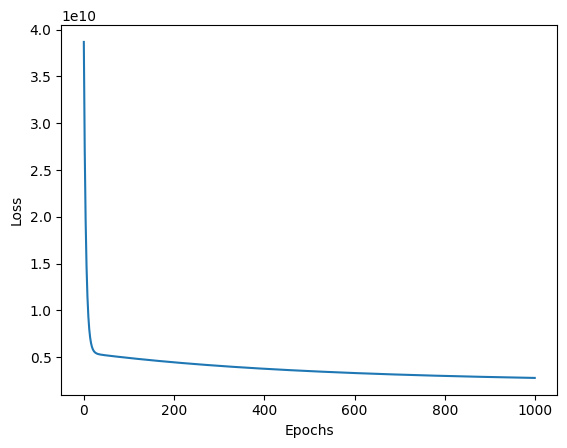

In [32]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### **Testing with test data**

Load and apply all the preprocessing steps used in the training data for the testing data as well. Remember to use the **SAME** min/max values which you used for the training set and not recalculate them from the test set. Also mention why we are doing this.

To load test data from GitHub, use the code below.


In [33]:
df_test = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/test_processed_splitted.csv')
print(df_test)

# One-hot encode the 'Utilities' column
df_test = pd.get_dummies(df_test, columns=['Utilities'], dtype='int32')

# Ensure all columns from training set are present in test set and add with 0 if not
for col in df.columns:
    if col not in df_test.columns:
        df_test[col] = 0

# Ensure the order of columns in df_test is the same as df
df_test = df_test[df.columns]

     LotArea  TotalBsmtSF  GrLivArea  GarageArea  PoolArea  OverallCond  \
0      15623         2396       4476         813       555            5   
1      11952          808       1969         534         0            6   
2       7558          896       1913         342         0            6   
3       6762         1187       1208         632         0            5   
4       8529         1454       1434         527         0            5   
..       ...          ...        ...         ...       ...          ...   
141     9135         1536       1536         532         0            5   
142    11639         1428       1428         480         0            5   
143    11475         1584       1776         888         0            5   
144     5925          907       1131         672         0            7   
145    14559         1008       1363         288         0            7   

    Utilities  SalePrice  
0      AllPub     745000  
1      AllPub     190000  
2      AllPub     

Using the weights learnt above, predict the values in the test dataset. Also answer the following questions:
- Are the predictions good?
- What is the MSE loss for the testset
- Is the MSE loss for testing greater or lower than training
- Why is this the case

In [34]:
# Scale the features

# Drop duplicate columns before scaling
df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()


# Fill NaN values
df_test.fillna(0, inplace=True)

# Scale features
# Select only the numeric columns for scaling
numeric_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns
# Exclude the target variable 'SalePrice' from scaling
numeric_cols_test = numeric_cols_test.drop('SalePrice')

# Check for and handle infinite values before scaling
if np.isinf(df_test[numeric_cols_test]).any().any():
    df_test[numeric_cols_test] = df_test[numeric_cols_test].replace([np.inf, -np.inf], np.nan)
    df_test.fillna(0, inplace=True) # Fill NaNs introduced by replacing infinities


# Apply Min-Max scaling using min/max from training data
# Check if max_values - min_values is zero to avoid division by zero
if (max_values - min_values).eq(0).any():
    print("Warning: Division by zero encountered during scaling.")
    # Handle cases where the range is zero (all values are the same)
    # For simplicity, we can just set these scaled values to 0 or 1
    zero_range_cols = (max_values - min_values).eq(0)
    df_test[numeric_cols_test.intersection(zero_range_cols.index[zero_range_cols])] = 0
    # Scale the remaining columns
    cols_to_scale = numeric_cols_test.difference(zero_range_cols.index[zero_range_cols])
    df_test[cols_to_scale] = (df_test[cols_to_scale] - min_values[cols_to_scale]) / (max_values[cols_to_scale] - min_values[cols_to_scale])
else:
    df_test[numeric_cols_test] = (df_test[numeric_cols_test] - min_values) / (max_values - min_values)


# Check for unexpected NaNs after scaling
if df_test[numeric_cols_test].isnull().any().any():
    print("Warning: NaN values found after scaling.")
    # Consider adding more robust handling here if needed


# The column alignment in cell 3iuQ4ulhAaTQ should handle the Utilities_AllPub column now,
# so we don't need to explicitly drop it here.
# if 'Utilities_AllPub' in df_test.columns:
#     df_test = df_test.drop('Utilities_AllPub', axis=1)


# Convert to numpy array and ensure numeric type
x_test = df_test.copy().drop('SalePrice', axis=1).to_numpy().astype(float) # (N, D)
y_test = df_test.copy()['SalePrice'].to_numpy().reshape(-1, 1) # (N, 1)
print(x_test.shape)

(146, 8)


In [35]:
extra_cols = list(set(df_test.columns) - set(df.columns))
print("Extra columns in df_test:", extra_cols)

missing_cols = list(set(df.columns) - set(df_test.columns))
print("Missing columns in df_test:", missing_cols)

Extra columns in df_test: []
Missing columns in df_test: []


In [36]:
# Make predictions
y_pred_test = x_test @ w + b # (N, 1)
loss_test = mse_loss_fn(y_test, y_pred_test)


# Scale the predictions back to the original scale

In [37]:
idx = np.random.randint(0, x_test.shape[0], 5)
y_pred_test_sample = y_pred_test[idx].round().astype(int)
y_true_test_sample = y_test[idx].round().astype(int)

print('Predicted SalePrice: \t', y_pred_test_sample.squeeze().tolist())
print('Actual SalePrice: \t', y_true_test_sample.squeeze().tolist())
print('\nTest Loss: \t\t', loss_test)

Predicted SalePrice: 	 [-9223372036854775808, -9223372036854775808, -9223372036854775808, -9223372036854775808, -9223372036854775808]
Actual SalePrice: 	 [200000, 182000, 235000, 202500, 179600]

Test Loss: 		 nan


/tmp/ipython-input-371385527.py:2: RuntimeWarning: invalid value encountered in cast
  y_pred_test_sample = y_pred_test[idx].round().astype(int)
